# 1. 
# seq = n_ary(seq)
# => function name hasn't been changed

In [1]:
def n_ary(f):
    """Given binary function f(x,y), return an n_ary function such that f(x,y,z) = f(x, f(y,z)), etc. Also allow f(x) = x"""
    
    def n_ary_f(x, *args):
        
        return x if not args else f(x, n_ary_f(*args))
    
    return n_ary_f
    
def seq(x,y):
        
    return ("seq", x, y)
    
seq = n_ary(seq)

print (help(seq))

Help on function n_ary_f in module __main__:

n_ary_f(x, *args)

None


# 2. 
# seq = n_ary(seq)
# => function name has been changed with update_wrapper
# => update_wrapper can change the original name to the new name

In [2]:
from functools import update_wrapper

def n_ary(f):

    def n_ary_f(x, *args):
        
        return x if not args else f(x, n_ary_f(*args))
    
    update_wrapper(n_ary_f, f)
    
    return n_ary_f
    
def seq(x,y):
        
    return ("seq", x, y)
    
seq = n_ary(seq)

print (help(seq))

Help on function seq in module __main__:

seq(x, y)

None


# 3.
# 用@n_ary (syntax candy)來取代seq = n_ary(seq)
# => 用@n_ary 來 modifies seq()

In [2]:
from functools import update_wrapper

def n_ary(f):
    
    """Given binary function f(x,y), return an n_ary function such that f(x,y,z) = f(x, f(y,z)), etc. Also allow f(x) = x"""
    
    def n_ary_f(x, *args):
        
        return x if not args else f(x, n_ary_f(*args))
    
    update_wrapper(n_ary_f, f)
    
    return n_ary_f

@n_ary
def seq(x,y):
        
    return ("seq", x, y)

print (help(seq))

Help on function seq in module __main__:

seq(x, y)

None


# 4.
# 將update_wrapper()的功能獨立寫成decorator()
# 再用@decorator 來 modifies n_ary()
# 再用@n_ary 來 modifies seq()

In [5]:
from functools import update_wrapper

def decorator(d):
    "Make function d a decorator: d wrapsa function fn"
    
    def _d(fn):
        
        return update_wrapper(d(fn), fn)
    
    update_wrapper(_d, d)
    
    return _d

@decorator
def n_ary(f):
    """Given binary function f(x,y), return an n_ary function such that f(x,y,z) = f(x, f(y,z)), etc. Also allow f(x) = x"""
    
    def n_ary_f(x, *args):
        
        return x if not args else f(x, n_ary_f(*args))

    return n_ary_f

@n_ary
def seq(x,y):
        
    return ("seq", x, y)

print (help(seq))
    

Help on function seq in module __main__:

seq(x, y)

None


# 5.
# 用countcalls()來計算function calls (@decorator 來 modifies countcalls())
# 用@countcalls 來 modifies fib(n) => 計算function calls
# 沒有memo() => fib(30)用2692537 calls

In [15]:
from functools import update_wrapper

def decorator(d):
    "Make function d a decorator: d wrapsa function fn"
    
    def _d(fn):
        
        return update_wrapper(d(fn), fn)
    
    update_wrapper(_d, d)
    
    return _d

@decorator
def countcalls(f):
    "Decorator that makes the function count calls to it, in callcounts[f]"

    def _f(*args):
        
        callcounts[_f] += 1
        
        return f(*args)
    
    callcounts[_f] = 0
    
    return _f

callcounts = {}

@countcalls
def fib(n):
    
    return 1 if n<=1 else fib(n-1) + fib(n-2)

print (fib(30), callcounts)

%timeit fib(30)

1346269 {<function fib at 0x00000172E3B0F8C8>: 2692537}
1.2 s ± 282 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 6.
# 用countcalls()來計算function calls (@decorator 來 modifies countcalls())
# 用@countcalls 來 modifies fib(n) => 計算function calls
# 用@memo 來 modifies fib(n) => memorization
# 有memo() => fib(30)用59 calls

In [16]:
from functools import update_wrapper

def decorator(d):
    "Make function d a decorator: d wrapsa function fn"
    
    def _d(fn):
        
        return update_wrapper(d(fn), fn)
    
    update_wrapper(_d, d)
    
    return _d

@decorator
def countcalls(f):
    "Decorator that makes the function count calls to it, in callcounts[f]"

    def _f(*args):
        
        callcounts[_f] += 1
        
        return f(*args)
    
    callcounts[_f] = 0
    
    return _f

callcounts = {}

@decorator
def memo(f):
    "Decorator that caches the return value for each call to f(args). Then when called again with same args, we can just look it up."
    
    cache = {}
    
    def _f(*args):
        
        try:
            
            return cache[args]
        
        except KeyError:
            
            cache[args] = result = f(*args)
            
            return result
        
        except TyprError:
            # Some element of args can't be a dict key. Ex: list can't be a dict key, because list is mutable
            # Ex: if put a list in a dict, and then change the list, but the value of list (original list) in the dict 
            # hasn't been changed 
            # Ex: list == [1,2,3] => dict[[1,2,3]] = 6 => dict = {[1,2,3]:6}
            # then modify the list => list[0] = 11 => list == [11,2,3] 
            # but in dict the value of the list hasn't been changed 
            # => dict = {[11,2,3]: 6} => very confusion for Python
            # so mutable data cannot be a dict key
            
            return f(args)
        
    return _f     
            
@countcalls
@memo
def fib(n):
    
    return 1 if n<=1 else fib(n-1) + fib(n-2)

print (fib(30), callcounts)

%timeit fib(30)

1346269 {<function fib at 0x00000172E3B0FD08>: 59}
555 ns ± 201 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# 7.
# 用@timer 來 modifies add()

In [7]:
import time

def timer(func):
    
    def wrapper(*args, **kwargs):
        
        start = time.time()
        
        func(*args, **kwargs) #此處拿到了被裝飾的函數func
        
        long = time.time() - start
        
        print (long)

    return wrapper #返回內層函數的引用

@timer
def add(a, b):
    
    print(a+b)

print (add(1, 2))


3
0.0
None


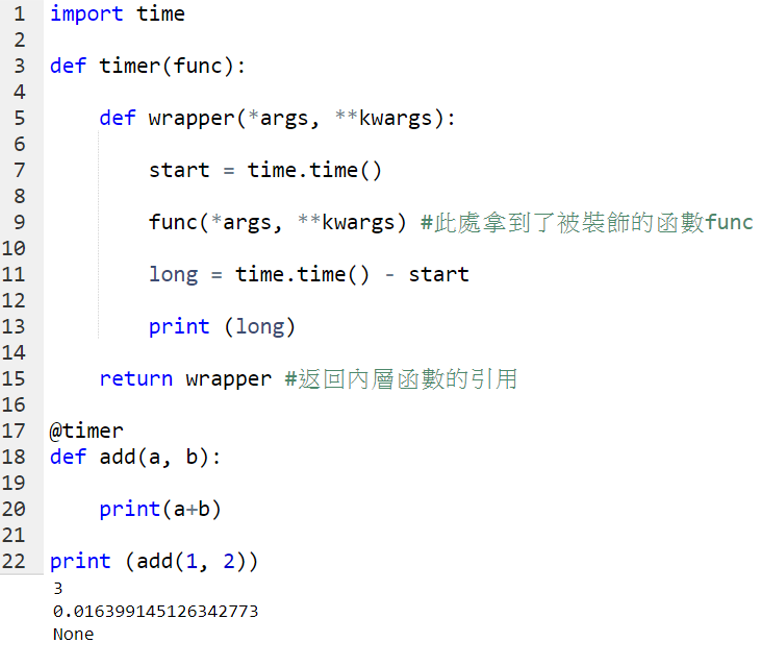

In [84]:
from IPython.display import Image

Image("Desktop\Ans..png")